In [2]:
!pip install opencv-python

In [3]:
from PIL import Image

print("Pillow εγκαταστάθηκε επιτυχώς!")

Pillow εγκαταστάθηκε επιτυχώς!


In [4]:
!pip install h5py

In [5]:
import h5py

# Άνοιγμα του αρχείου HDF5
file_path = 'Malta.h5'

with h5py.File(file_path, 'r') as h5_file:
    # Λίστα όλων των datasets στο αρχείο
    datasets = list(h5_file.keys())
    print(f"Το αρχείο περιέχει {len(datasets)} datasets:")
    for dataset in datasets:
        print(dataset)


Το αρχείο περιέχει 79 datasets:
Lucas_Point_47021452
Lucas_Point_47021454
Lucas_Point_47021456
Lucas_Point_47041452
Lucas_Point_47041454
Lucas_Point_47041456
Lucas_Point_47061452
Lucas_Point_47061454
Lucas_Point_47061456
Lucas_Point_47081450
Lucas_Point_47081452
Lucas_Point_47081454
Lucas_Point_47081456
Lucas_Point_47101452
Lucas_Point_47101454
Lucas_Point_47121452
Lucas_Point_47121454
Lucas_Point_47141452
Lucas_Point_47161438
Lucas_Point_47161440
Lucas_Point_47161442
Lucas_Point_47161444
Lucas_Point_47161446
Lucas_Point_47161450
Lucas_Point_47181436
Lucas_Point_47181438
Lucas_Point_47181440
Lucas_Point_47181442
Lucas_Point_47181444
Lucas_Point_47201434
Lucas_Point_47201436
Lucas_Point_47201438
Lucas_Point_47201440
Lucas_Point_47201442
Lucas_Point_47201444
Lucas_Point_47221432
Lucas_Point_47221434
Lucas_Point_47221436
Lucas_Point_47221438
Lucas_Point_47221440
Lucas_Point_47221442
Lucas_Point_47241432
Lucas_Point_47241434
Lucas_Point_47241436
Lucas_Point_47241438
Lucas_Point_47241440
Lu

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Άνοιγμα του αρχείου HDF5
file_path = 'Malta.h5'

with h5py.File(file_path, 'r') as h5_file:
    dataset = h5_file['Lucas_Point_47201436']

    # Επιλέγουμε ένα δείγμα (π.χ., το πρώτο δείγμα από τα 51)
    sample = dataset[0]  # sample 0

    # Απομονώνουμε τα κανάλια B2 (μπλε), B3 (πράσινο), B4 (κόκκινο), B8 (υπέρυθρο)
    B2 = sample['B2']
    B3 = sample['B3']
    B4 = sample['B4']
    B8 = sample['B8']
    

    # Εκτύπωση των min και max τιμών πριν την κανονικοποίηση
    print("Before normalization:")
    print(f"B2 - Min: {np.min(B2)}, Max: {np.max(B2)}")
    print(f"B3 - Min: {np.min(B3)}, Max: {np.max(B3)}")
    print(f"B4 - Min: {np.min(B4)}, Max: {np.max(B4)}")
    print(f"B8 - Min: {np.min(B8)}, Max: {np.max(B8)}")

Before normalization:
B2 - Min: 1, Max: 2919
B3 - Min: 1, Max: 3523
B4 - Min: 1, Max: 4144
B8 - Min: 739, Max: 6569


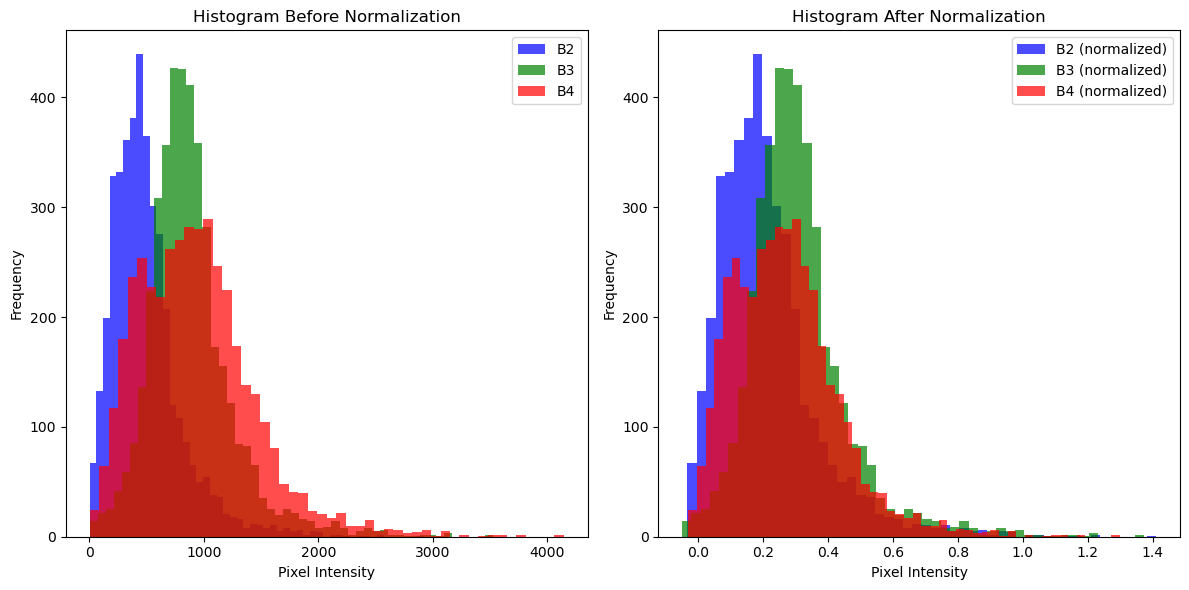

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


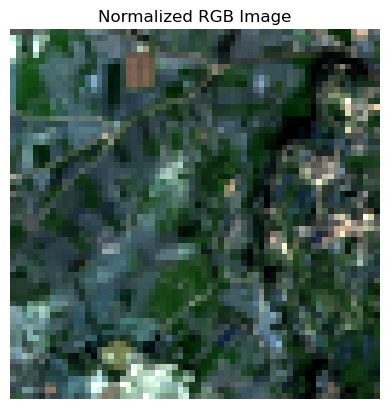

In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Συνάρτηση min-max normalization
def min_max_normalize(image, min_val, max_val):
    return (image - min_val) / (max_val - min_val)

# Άνοιγμα του αρχείου HDF5
file_path = 'Malta.h5'

with h5py.File(file_path, 'r') as h5_file:
    # Επιλέγουμε το dataset που θέλουμε να οπτικοποιήσουμε
    dataset = h5_file['Lucas_Point_47201436']

    # Επιλέγουμε ένα δείγμα (π.χ., το πρώτο δείγμα από τα 51)
    sample = dataset[0]  # sample 0

    # Απομονώνουμε τα κανάλια B2 (μπλε), B3 (πράσινο), B4 (κόκκινο), B8 (υπέρυθρο)
    B2 = sample['B2']
    B3 = sample['B3']
    B4 = sample['B4']
    
    
   

    # Κανονικοποίηση των καναλιών
    min_vals = np.array([67.0, 122.0, 93.27, 158.5])
    max_vals = np.array([2089.0, 2598.45, 3214.5, 3620.45])

    B2_normalized = min_max_normalize(B2, min_vals[0], max_vals[0])
    B3_normalized = min_max_normalize(B3, min_vals[1], max_vals[1])
    B4_normalized = min_max_normalize(B4, min_vals[2], max_vals[2])

    # Επαναφορά στο εύρος [0, 255]
    B2_scaled = np.clip(B2_normalized * 255, 0, 255).astype(np.uint8)
    B3_scaled = np.clip(B3_normalized * 255, 0, 255).astype(np.uint8)
    B4_scaled = np.clip(B4_normalized * 255, 0, 255).astype(np.uint8)

    # Δημιουργούμε την εικόνα RGB με τα κανονικοποιημένα κανάλια
    rgb_image = np.stack([B2_normalized,B3_normalized,B4_normalized], axis=-1)

    # --- Δημιουργία ιστογράμματος για την αρχική και την κανονικοποιημένη εικόνα ---
    plt.figure(figsize=(12, 6))

    # Ιστόγραμμα αρχικής εικόνας (πριν την κανονικοποίηση)
    plt.subplot(1, 2, 1)
    plt.hist(B2.flatten(), bins=50, color='blue', alpha=0.7, label='B2')
    plt.hist(B3.flatten(), bins=50, color='green', alpha=0.7, label='B3')
    plt.hist(B4.flatten(), bins=50, color='red', alpha=0.7, label='B4')
    plt.title('Histogram Before Normalization')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()

    # Ιστόγραμμα κανονικοποιημένης εικόνας (μετά την κανονικοποίηση)
    plt.subplot(1, 2, 2)
    plt.hist(B2_normalized.flatten(), bins=50, color='blue', alpha=0.7, label='B2 (normalized)')
    plt.hist(B3_normalized.flatten(), bins=50, color='green', alpha=0.7, label='B3 (normalized)')
    plt.hist(B4_normalized.flatten(), bins=50, color='red', alpha=0.7, label='B4 (normalized)')
    plt.title('Histogram After Normalization')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Προβολή της κανονικοποιημένης εικόνας
    plt.imshow(rgb_image)
    plt.title("Normalized RGB Image")
    plt.axis('off')  # Απενεργοποίηση των αξόνων για καλύτερη εμφάνιση
    plt.show()

<h1>MALTA & ETCN</h1>

Shape of normalized images: (51, 64, 64, 3)


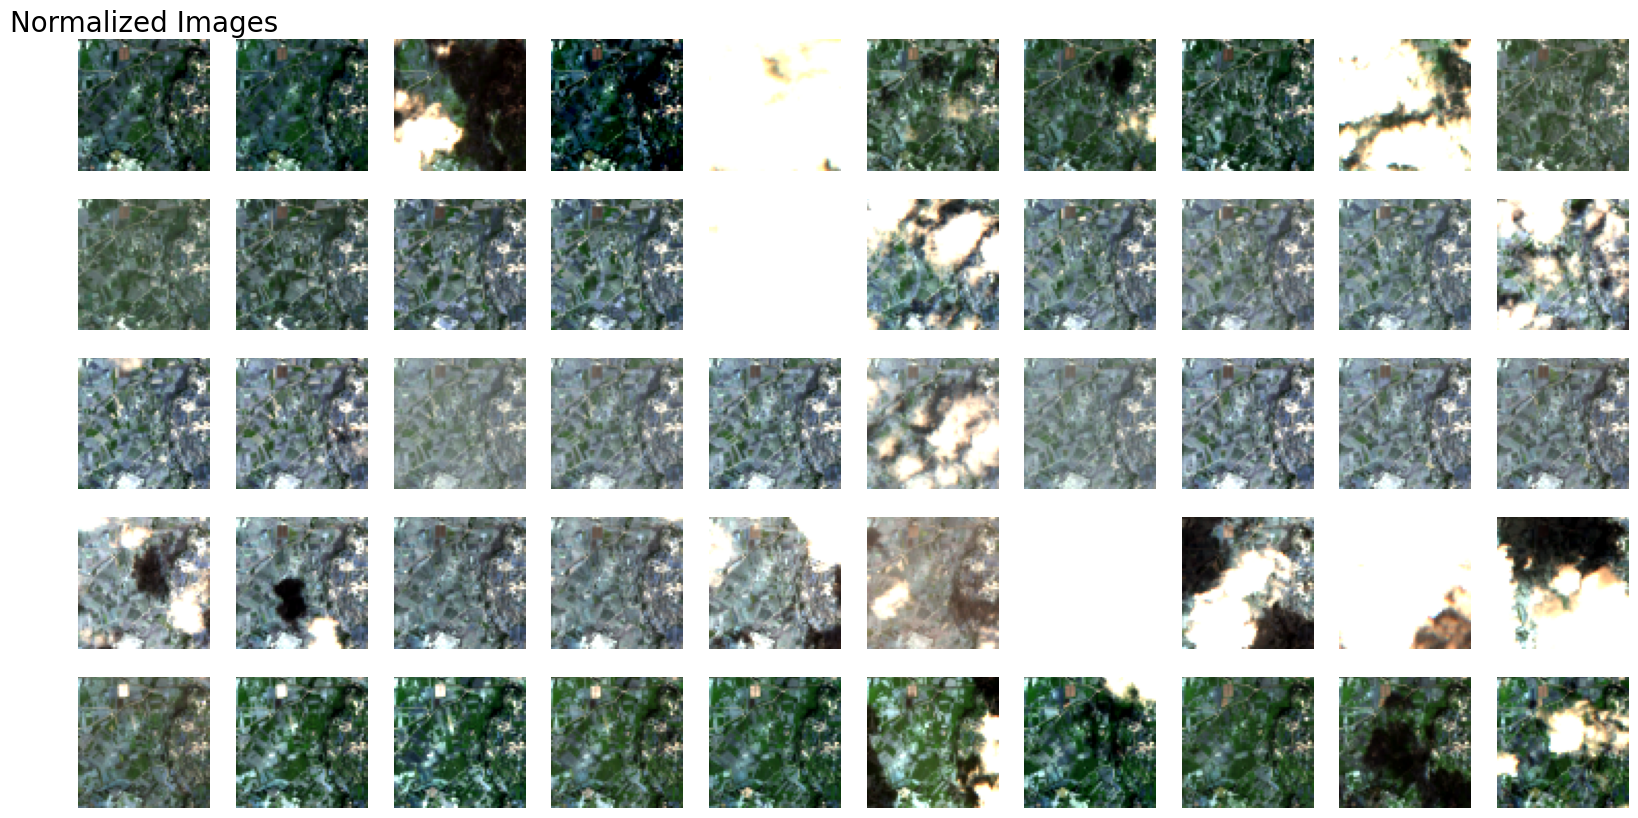

In [8]:
import h5py
import numpy as np
import cv2

# Κανονικοποίηση με βάση τις ελάχιστες και μέγιστες τιμές για κάθε κανάλι
min_vals = np.array([67.0, 122.0, 93.27, 158.5])  # min για B2, B3, B4, B8
max_vals = np.array([2089.0, 2598.45, 3214.5, 3620.45])  # max για B2, B3, B4, B8

# Συνάρτηση min-max normalization
def min_max_normalize(image, min_val, max_val):
    return (image - min_val) / (max_val - min_val)

# Άνοιγμα του αρχείου HDF5
file_path = 'Malta.h5'

with h5py.File(file_path, 'r') as h5_file:
    dataset = h5_file['Lucas_Point_47201436']  # Πρόσβαση στο dataset
    
    normalized_images = []  # Αποθήκευση των κανονικοποιημένων εικόνων
    
    for i in range(len(dataset)):  # Κανονικοποίηση για κάθε δείγμα στο dataset
        sample = dataset[i]  # Παίρνουμε κάθε δείγμα

        # Απομονώνουμε τα κανάλια B2 (μπλε), B3 (πράσινο), B4 (κόκκινο), B8 (υπέρυθρο)
        B2 = sample['B2']
        B3 = sample['B3']
        B4 = sample['B4']
        #B8 = sample['B8']

        # Κανονικοποίηση των καναλιών
        B2_normalized = min_max_normalize(B2, min_vals[0], max_vals[0])
        B3_normalized = min_max_normalize(B3, min_vals[1], max_vals[1])
        B4_normalized = min_max_normalize(B4, min_vals[2], max_vals[2])
        #B8_normalized = min_max_normalize(B8, min_vals[3], max_vals[3])
    

        # Συνδυασμός καναλιών
        normalized_image = np.stack([B2_normalized, B3_normalized, B4_normalized], axis=-1)
        
        # Προσθήκη στην λίστα κανονικοποιημένων εικόνων
        normalized_images.append(normalized_image)

    normalized_images = np.clip(normalized_images, 0, 1)
  

print(f"Shape of normalized images: {normalized_images.shape}")

# Προβολή των 51 κανονικοποιημένων εικόνων
fig, axes = plt.subplots(5, 10, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(normalized_images[i])
    ax.axis('off')
    
    if i == 0:
        ax.set_title("Normalized Images", fontsize=20)
        

plt.show()



<h1>Frame -> ETCN -> Result</h1>

Shape of dataset Lucas_Point_47361436: (51, 64, 64, 3)


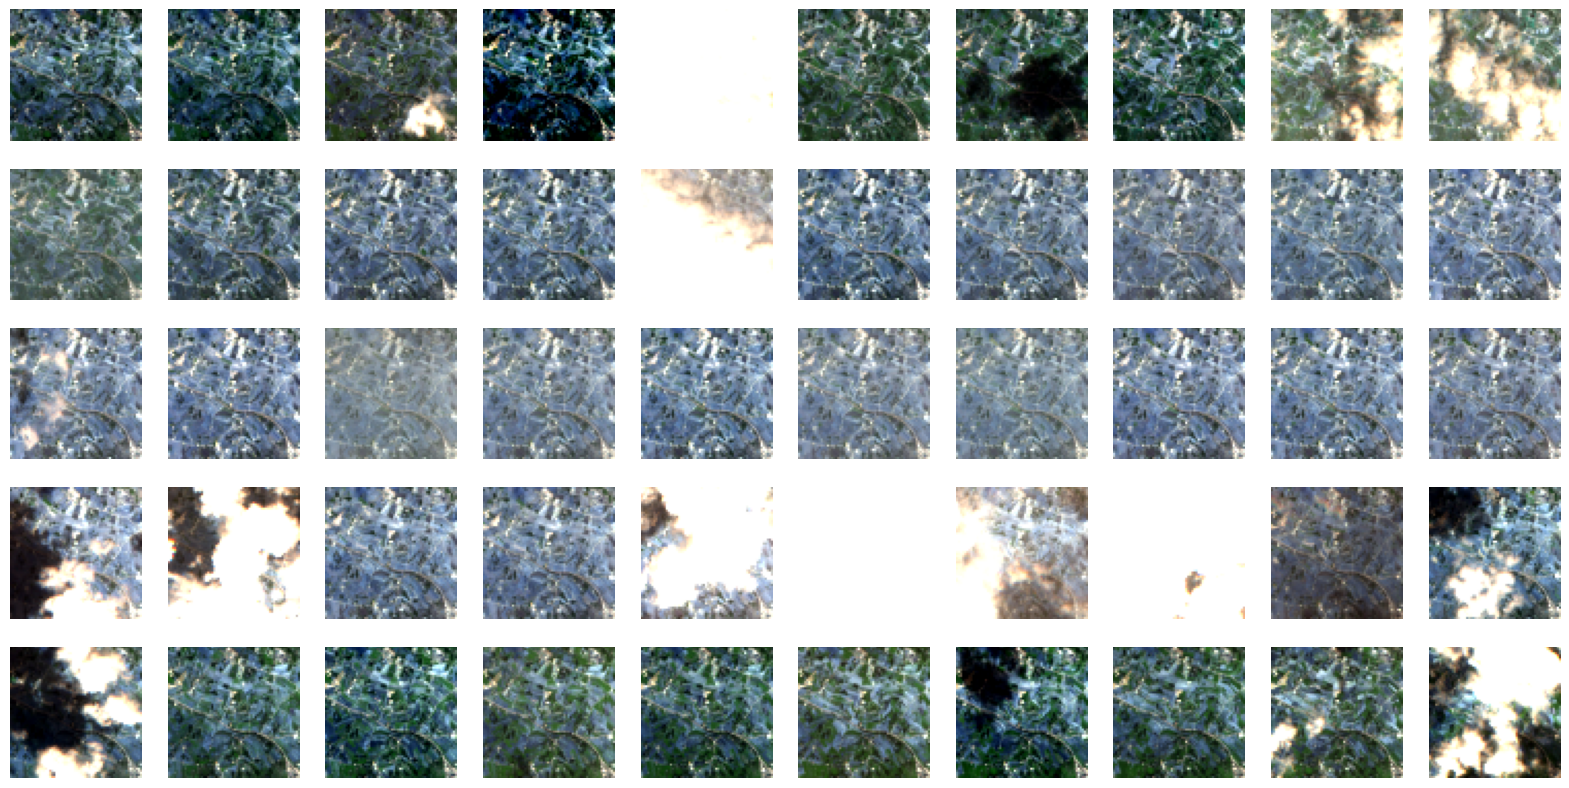

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Κανονικοποίηση με βάση τις ελάχιστες και μέγιστες τιμές για κάθε κανάλι
min_vals = np.array([67.0, 122.0, 93.27, 158.5])  # min για B2, B3, B4, B8
max_vals = np.array([2089.0, 2598.45, 3214.5, 3620.45])  # max για B2, B3, B4, B8

# Συνάρτηση min-max normalization
def min_max_normalize(image, min_val, max_val):
    return (image - min_val) / (max_val - min_val)

# Άνοιγμα του αρχείου HDF5
file_path = 'Malta.h5'

# Κανονικοποίηση όλων των datasets και αποθήκευση σε λίστα
normalized_data = {}

with h5py.File(file_path, 'r') as h5_file:
    datasets = list(h5_file.keys())  # Λίστα με όλα τα ονόματα των datasets
    
    for dataset_name in datasets:
        dataset = h5_file[dataset_name]
        
        normalized_images = []  # Αποθήκευση των κανονικοποιημένων εικόνων για κάθε dataset
        
        for i in range(len(dataset)):  # Κανονικοποίηση για κάθε δείγμα στο dataset
            sample = dataset[i]  # Παίρνουμε κάθε δείγμα

            # Απομονώνουμε τα κανάλια B2 (μπλε), B3 (πράσινο), B4 (κόκκινο)
            B2 = sample['B2']
            B3 = sample['B3']
            B4 = sample['B4']

            # Κανονικοποίηση των καναλιών
            B2_normalized = min_max_normalize(B2, min_vals[0], max_vals[0])
            B3_normalized = min_max_normalize(B3, min_vals[1], max_vals[1])
            B4_normalized = min_max_normalize(B4, min_vals[2], max_vals[2])

            # Συνδυασμός καναλιών
            normalized_image = np.stack([B2_normalized, B3_normalized, B4_normalized], axis=-1)
            
            # Προσθήκη στην λίστα κανονικοποιημένων εικόνων
            normalized_images.append(normalized_image)

        # Αποθήκευση του normalized dataset σε λεξικό
        normalized_data[dataset_name] = np.clip(normalized_images, 0, 1)

# Εμφάνιση του σχήματος των κανονικοποιημένων δεδομένων για το πρώτο dataset
print(f"Shape of dataset {datasets[78]}: {normalized_data[datasets[78]].shape}")

# Προβολή κάποιων κανονικοποιημένων εικόνων από το πρώτο dataset
fig, axes = plt.subplots(5, 10, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(normalized_data[datasets[78]][i])
    ax.axis('off')
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Λίστα για να συγκεντρώσουμε όλες τις εικόνες από όλα τα datasets
all_images = []

# Συγκέντρωση όλων των εικόνων από όλα τα datasets
for dataset_name in datasets:
    all_images.extend(normalized_data[dataset_name])

# Μετατροπή της λίστας σε numpy array
all_images = np.clip(np.array(all_images), 0, 1)



# Εκτύπωση του συνολικού σχήματος των εικόνων

print(f"Total number of images: {all_images.shape[0]}")
print(f"Shape of individual images: {all_images.shape[1:]}")


Total number of images: 4294
Shape of individual images: (64, 64, 3)


In [11]:
import h5py
import numpy as np

# Συνάρτηση min-max normalization
def min_max_normalize(image, min_val, max_val):
    return (image - min_val) / (max_val - min_val)

# Εύρος κανονικοποίησης για τα κανάλια B2, B3, B4
min_vals = np.array([67.0, 122.0, 93.27])  # Min values for B2, B3, B4
max_vals = np.array([2089.0, 2598.45, 3214.5])  # Max values for B2, B3, B4

# Άνοιγμα του αρχείου HDF5
file_path = 'Malta.h5'
all_images = []  # Λίστα για να αποθηκεύσουμε όλες τις εικόνες

with h5py.File(file_path, 'r') as h5_file:
    # Επανάληψη για όλα τα datasets στο αρχείο
    for dataset_name in h5_file.keys():
        dataset = h5_file[dataset_name]  # Πρόσβαση στο dataset

        # Επανάληψη για όλα τα δείγματα στο dataset
        for sample in dataset:
            # Απομονώνουμε τα κανάλια B2, B3, B4
            B2 = sample['B2']
            B3 = sample['B3']
            B4 = sample['B4']

            # Κανονικοποίηση των καναλιών
            B2_normalized = min_max_normalize(B2, min_vals[0], max_vals[0])
            B3_normalized = min_max_normalize(B3, min_vals[1], max_vals[1])
            B4_normalized = min_max_normalize(B4, min_vals[2], max_vals[2])

            # Δημιουργία εικόνας RGB (B4=κόκκινο, B3=πράσινο, B2=μπλε)
            rgb_image = np.stack([B4_normalized, B3_normalized, B2_normalized], axis=-1)
            
            # Προσθήκη της εικόνας στη λίστα
            all_images.append(rgb_image)

# Μετατροπή της λίστας σε NumPy array
all_images = np.array(all_images)

# Εκτύπωση του συνολικού αριθμού εικόνων και του σχήματος κάθε εικόνας
print(f"Total number of images: {all_images.shape[0]}")  # Αναμένουμε 4294 εικόνες
print(f"Shape of each image: {all_images.shape[1:]}")    # Σχήμα κάθε εικόνας (π.χ., 64x64x3 αν οι εικόνες είναι RGB)

# Περιορισμός των τιμών στο εύρος [0, 1] εάν οι εικόνες είναι κανονικοποιημένες
all_images_clipped = np.clip(all_images, 0, 1)

# Εκτύπωση του σχήματος του dataset μετά το clipping
print(f"Shape after clipping: {all_images_clipped.shape}")


Total number of images: 4294
Shape of each image: (64, 64, 3)
Shape after clipping: (4294, 64, 64, 3)


In [12]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, TimeDistributed, Conv2D, MaxPooling2D, Flatten, Conv1D, SpatialDropout1D, Reshape, Conv2DTranspose, Activation
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Set seed for reproducibility
tf.random.set_seed(1234)

window = 8  # Χρονικό παράθυρο

# Αντικαθιστούμε τα frames με τα δικά σου δεδομένα από το all_images_clipped
frames = all_images_clipped  # Πρέπει να έχεις το dataset σου ήδη κανονικοποιημένο με σχήμα (4294, 64, 64, 3)

# Χωρισμός σε train/test
train_frames = frames[:int(0.8*len(frames))]  # 80% train
test_frames = frames[int(0.8*len(frames)):]  # 20% test

# Κανονικοποίηση
# maxi = np.max(train_frames)
# mini = np.min(train_frames)
# train_frames = (train_frames - mini) / (maxi - mini)
# test_frames = (test_frames - mini) / (maxi - mini)

# Δημιουργία X_train και y_train για παράθυρο χρονικών στιγμών
X_train, y_train = [], []
for i in range(len(train_frames) - window):
    X_train.append(train_frames[i:i+window])
    y_train.append(train_frames[i+1:i+window+1])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test, y_test = [], []
for i in range(len(test_frames) - window):
    X_test.append(test_frames[i:i+window])
    y_test.append(test_frames[i+1:i+window+1])

X_test = np.array(X_test)
y_test = np.array(y_test)



# Δημιουργία τυχαίων δειγμάτων για το validation set
r = random.sample(range(len(X_train)), 20)

# Δημιουργία μάσκας για να κρατήσουμε μόνο τα δείγματα που ΔΕΝ είναι στο validation set
mask = np.ones(len(X_train), dtype=bool)
mask[r] = False  # Βάζουμε False στις θέσεις των validation δεδομένων

# Διαχωρισμός των δεδομένων
X_val = X_train[r]  # Validation set
y_val = y_train[r]  # Validation labels
X_train = X_train[mask]  # Training set χωρίς τα validation δεδομένα
y_train = y_train[mask]  # Training labels χωρίς τα validation δεδομένα

# Έλεγχος σχήματος
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

C:\Users\Panagiotis\.conda\envs\Nemesis\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Panagiotis\.conda\envs\Nemesis\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue

Training set shape: (3407, 8, 64, 64, 3)
Validation set shape: (20, 8, 64, 64, 3)
Test set shape: (851, 8, 64, 64, 3)


In [13]:
import tensorflow_addons as tfa
from tensorflow.keras.layers import Conv1D, TimeDistributed, Conv2D, MaxPooling2D, Activation, \
    SpatialDropout1D, Reshape, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Κατασκευή ETCN Μοντέλου
inp = Input((8, 64, 64, 3))  # Είσοδος για 8 εικόνες 64x64 με 3 κανάλια
e = TimeDistributed(Conv2D(32, (4, 4), activation='relu', padding='same'))(inp)
e = TimeDistributed(MaxPooling2D((2, 2)))(e)
e = TimeDistributed(Conv2D(64, (4, 4), activation='relu', padding='same'))(e)
e = TimeDistributed(MaxPooling2D((2, 2)))(e)
e = TimeDistributed(Conv2D(64, (4, 4), activation='relu', padding='same'))(e)

# Reshape για να μετατρέψουμε το 4D tensor σε 3D, έτσι ώστε να τροφοδοτήσουμε το Conv1D
l_o = TimeDistributed(Flatten())(e)

# T C N 
num_inputs = 64
num_channels = [64, 49, 49]
kernel_size = 4
dropout = 0.3
num_levels = len(num_channels)

for i in range(num_levels):
    in_channels = num_inputs if i == 0 else num_channels[i - 1]

    # Εφαρμογή Conv1D με weight normalization
    l = tfa.layers.WeightNormalization(
        Conv1D(filters=num_channels[i], kernel_size=kernel_size, padding='causal', dilation_rate=2 ** i))(l_o)
    l = Activation('relu')(l)
    l = SpatialDropout1D(dropout)(l)

    # Εφαρμογή δεύτερης στρώσης Conv1D με weight normalization
    l = tfa.layers.WeightNormalization(
        Conv1D(filters=num_channels[i], kernel_size=kernel_size, padding='causal', dilation_rate=2 ** i))(l)
    l = Activation('relu')(l)
    l = SpatialDropout1D(dropout)(l)

    # Ενημέρωση του l_o για το επόμενο επίπεδο
    l_o = l

# Έλεγχος του σχήματος εξόδου
print(f"Shape after TCN: {l_o.shape}")  # Αναμένουμε (None, 8, 49)

Shape after TCN: (None, 8, 49)


In [14]:
from tensorflow.keras.layers import Dense

# DECODER PART - Αποκωδικοποίηση της εξόδου για ανακατασκευή των εικόνων


d = TimeDistributed(Dense(8 * 8 * 64, activation='relu'))(l_o)  # Από (None, 8, 49) σε (None, 8, 8 * 8 * 64)

# Επαναδιαμόρφωση σε 8x8x64 για να περάσουμε τα Conv2DTranspose layers
d = TimeDistributed(Reshape((8, 8, 64)))(d)  # Επαναδιαμορφώνουμε σε (8, 8, 64)

# Conv2DTranspose layers για να αυξήσουμε τις διαστάσεις
d = TimeDistributed(Conv2DTranspose(64, (4, 4), strides=2, activation='relu', padding='same'))(d)  

d = TimeDistributed(Conv2DTranspose(64, (4, 4), strides=2, activation='relu', padding='same'))(d)  
d = TimeDistributed(Conv2DTranspose(32, (4, 4), strides=2, activation='relu', padding='same'))(d)  

# Τελική στρώση για ανακατασκευή των εικόνων 64x64x3
decoded = TimeDistributed(Conv2D(3, (4, 4), activation='sigmoid', padding='same'))(d)  # 64x64x3

# Κατασκευή του μοντέλου
ae_ETCN = Model(inp, decoded)

# Επισκόπηση του μοντέλου
ae_ETCN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 64, 64, 3)]    0         
                                                                 
 time_distributed (TimeDistr  (None, 8, 64, 64, 32)    1568      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 8, 32, 32, 32)    0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 8, 32, 32, 64)    32832     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 8, 16, 16, 64)    0         
 tributed)                                                   

C:\Users\Panagiotis\.conda\envs\Nemesis\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
852/852 [==============================] - ETA: 0s - loss: 0.0848
Epoch 1: val_loss improved from inf to 0.07505, saving model to E-TCN_best.h5
852/852 [==============================] - 529s 615ms/step - loss: 0.0848 - val_loss: 0.0751
Epoch 2/100
852/852 [==============================] - ETA: 0s - loss: 0.0796
Epoch 2: val_loss did not improve from 0.07505
852/852 [==============================] - 513s 602ms/step - loss: 0.0796 - val_loss: 0.0754
Epoch 3/100
852/852 [==============================] - ETA: 0s - loss: 0.0782
Epoch 3: val_loss improved from 0.07505 to 0.07384, saving model to E-TCN_best.h5
852/852 [==============================] - 501s 588ms/step - loss: 0.0782 - val_loss: 0.0738
Epoch 4/100
852/852 [==============================] - ETA: 0s - loss: 0.0771
Epoch 4: val_loss improved from 0.07384 to 0.07192, saving model to E-TCN_best.h5
852/852 [==============================] - 509s 597ms/step - loss: 0.0771 - val_loss: 0.0719
Epoch 5/100
852/852 [======

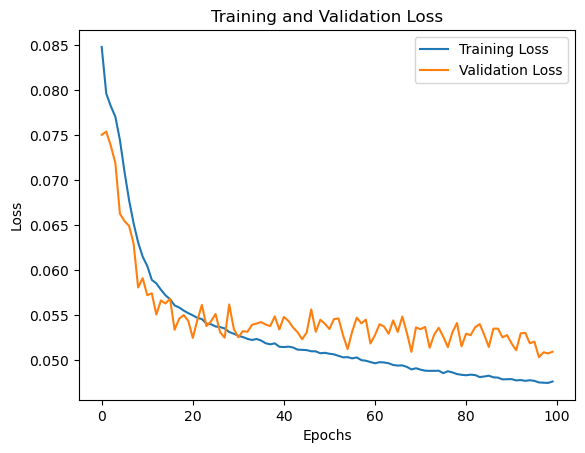

In [15]:
# Ρύθμιση optimizer
optzr = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999)

# Συμπίεση του ETCN
ae_ETCN.compile(loss="mse", optimizer=optzr)

# ModelCheckpoint για αποθήκευση του καλύτερου μοντέλου
best_model_file = "E-TCN_best.h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Εκπαίδευση του ETCN με τα δεδομένα εκπαίδευσης και αξιολόγηση με τα δεδομένα επικύρωσης
history = ae_ETCN.fit(X_train, y_train, epochs=100, batch_size=4, callbacks=[best_model], validation_data=(X_val, y_val))

# Φόρτωση των καλύτερων weights μετά την εκπαίδευση
ae_ETCN.load_weights(best_model_file)

# Αξιολόγηση του μοντέλου με το test set
test_loss = ae_ETCN.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
# Εκτύπωση του training και validation loss ανά εποχή
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()